# Initial Data Exploration

In [1]:
# Import libraries
import pandas as pd # Import data file, checking dimensions, etc.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/raw/wwlLancMsc_data.csv')

df_copy = df.copy()
    
print("--- Structure Checking --- ")
print(df.shape) # Checking the structure or dimension of the dataset.

print("--- Structure Checking 2 --- ")
df.info(verbose=True, show_counts=True) # Added verbose and show_counts since the number of columns is too many, got hidden.



--- Structure Checking --- 
(41846, 101)
--- Structure Checking 2 --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 101 columns):
 #    Column                                         Non-Null Count  Dtype  
---   ------                                         --------------  -----  
 0    site_national_code                             41846 non-null  object 
 1    site_description                               41846 non-null  object 
 2    site_local_code                                41846 non-null  object 
 3    Admission_Date                                 41846 non-null  object 
 4    admission_date_dt                              41846 non-null  object 
 5    discharge_date_dt                              41846 non-null  object 
 6    specialty_local_code                           41846 non-null  object 
 7    specialty_spec_code                            41846 non-null  int64  
 8    specialty_spec_desc                        

/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/2610176679.py:1: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/wwlLancMsc_data.csv')


In [3]:
print("\n--- Values Checking ---")
print(df.describe()) # Checking for the values info of the dataset.


--- Values Checking ---
       specialty_spec_code  duration_elective_wait  patient_age_on_admission  \
count         41846.000000            17295.000000              41846.000000   
mean            244.584668              105.389303                 56.907470   
std             118.221109              172.722877                 23.284725   
min             100.000000                0.000000                  1.000000   
25%             110.000000               18.000000                 41.000000   
50%             300.000000               49.000000                 62.000000   
75%             301.000000              132.000000                 75.000000   
max             560.000000             3415.000000                104.000000   

       patient_age_on_discharge  spell_episode_los  \
count              41846.000000       41846.000000   
mean                  56.912274           1.759427   
std                   23.287412           5.281628   
min                    1.000000       

In [4]:
print(f'\nThe first five rows of data: \n {df.head()}') # Checking sample of the data


The first five rows of data: 
   site_national_code               site_description site_local_code  \
0              RRF01                LEIGH INFIRMARY             LEI   
1              RRF53          WRIGHTINGTON HOSPITAL             WNT   
2              RRF02  ROYAL ALBERT EDWARD INFIRMARY            RAEI   
3              RRF53          WRIGHTINGTON HOSPITAL             WNT   
4              RRF02  ROYAL ALBERT EDWARD INFIRMARY            RAEI   

  Admission_Date    admission_date_dt    discharge_date_dt  \
0     2023-07-15  15/07/2023 13:57:00  15/07/2023 16:00:00   
1     2023-07-05  05/07/2023 08:37:00  05/07/2023 10:08:00   
2     2023-06-08  08/06/2023 11:45:00  08/06/2023 12:50:00   
3     2023-06-08  08/06/2023 07:13:00  08/06/2023 17:35:00   
4     2023-06-08  08/06/2023 08:29:00  08/06/2023 15:34:00   

  specialty_local_code  specialty_spec_code    specialty_spec_desc  \
0                 CREC                  104     Colorectal Surgery   
1                   TO      

In [5]:
pd.options.mode.use_inf_as_na = True # Considering the " "(empty space) as empty values

missing_data = df.isna().sum() # Sum the empty columns up
missing_data = pd.DataFrame(missing_data)
missing_data.columns = ["Num"]
missing_data["Percentage"] = ((df.isna().sum()) / len(df)) * 100
missing_data_sorted = missing_data.sort_values("Percentage", ascending=False)

pd.options.display.max_rows = None # Display full data, or else it will not displaying the proper one

print(f'The number of columns with empty values: {sum(missing_data_sorted["Percentage"] != 0)}')
print(missing_data_sorted)

/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/776240142.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True # Considering the " "(empty space) as empty values


The number of columns with empty values: 28
                                                 Num  Percentage
social_worker_date_time_referred               41846  100.000000
discharge_delay_reason_national_code           41846  100.000000
covid19_diagnosis_flag                         41695   99.639153
covid19_diagnosis_description                  41695   99.639153
date_of_death_dt                               40315   96.341347
NEWS2                                          32096   76.700282
inj_or_ail                                     31824   76.050280
acuity_code                                    30829   73.672514
place_of_incident                              30468   72.809827
Arrival_Date                                   30382   72.604311
arrival_date_time                              30382   72.604311
initial_assessment_date_time                   30382   72.604311
sex_description.y                              30382   72.604311
arrival_mode_description                      

In [6]:
# Check if there's any columns have the same columns names with others.
print(f'The number of distinct columns: {len(set(df.columns))}')

The number of distinct columns: 101


In [7]:
# Checking if there's different columns name contain exactly same data
import pandas as pd

same_cols = []

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:  # Avoids for comparing with the same
            if df[col1].equals(df[col2]) and df[col1].notna().all() and df[col2].notna().all():
                Same_pair = sorted((col1, col2))
                if Same_pair not in same_cols: 
                    same_cols.append(Same_pair)
                    
print(same_cols)

[['delayed_discharges_flag', 'medically_optimised']]


In [8]:
# Checking the content of two same data columns.
print(set(df["medically_optimised"]))
print(set(df["delayed_discharges_flag"]))

{0, 1}
{0, 1}


In [9]:
# Check how many rows of data that are 100% same with other rows.
duplicate_row_count = df.duplicated().sum()

print(f"There are {duplicate_row_count} duplicate rows.")

There are 0 duplicate rows.


# Data cleaning and EDA

## site_national_code, site_description
As site_description is fully dependent to the site_national_code, so they are processed together in here.

site_national_code
RRF02    28833
RRF01     6616
RRF53     6350
RRF70       47
Name: count, dtype: int64

site_description
ROYAL ALBERT EDWARD INFIRMARY     28833
LEIGH INFIRMARY                    6616
WRIGHTINGTON HOSPITAL              6350
BOSTON HOUSE, WIGAN HEALTH CTR       47
Name: count, dtype: int64

Null value for site_national_code: 0
Null value for site_description: 0


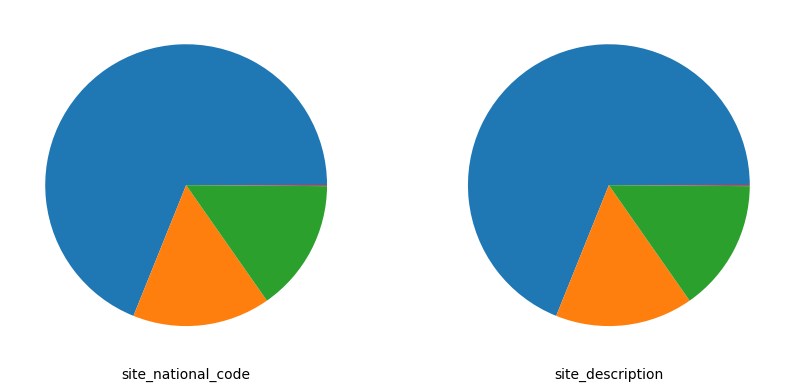

In [10]:
print(f'{df["site_national_code"].value_counts()}')
print(f'\n{df["site_description"].value_counts()}')

figure, axis = plt.subplots(1, 2, figsize = (10, 5))

# Printing out two figures for direct comparison.
axis[0].pie(df["site_national_code"].value_counts())
axis[0].set_xlabel("site_national_code")

axis[1].pie(df["site_description"].value_counts())
axis[1].set_xlabel("site_description")

print(f'\nNull value for site_national_code: {df["site_national_code"].isna().sum()}')
print(f'Null value for site_description: {df["site_description"].isna().sum()}')

The same classes distribution pattern suggest that the site_national_code and site_description are interrelated and the site_description can be removed.


In [11]:
# One hot encoding.
print(f'Shape before: {df_copy.shape}')
df_copy = pd.get_dummies(df_copy, columns = ["site_national_code"], dtype=int)

print(df_copy.head()) # The column will be added down, replacing the site_national_code

Shape before: (41846, 101)
                site_description site_local_code Admission_Date  \
0                LEIGH INFIRMARY             LEI     2023-07-15   
1          WRIGHTINGTON HOSPITAL             WNT     2023-07-05   
2  ROYAL ALBERT EDWARD INFIRMARY            RAEI     2023-06-08   
3          WRIGHTINGTON HOSPITAL             WNT     2023-06-08   
4  ROYAL ALBERT EDWARD INFIRMARY            RAEI     2023-06-08   

     admission_date_dt    discharge_date_dt specialty_local_code  \
0  15/07/2023 13:57:00  15/07/2023 16:00:00                 CREC   
1  05/07/2023 08:37:00  05/07/2023 10:08:00                   TO   
2  08/06/2023 11:45:00  08/06/2023 12:50:00                   GS   
3  08/06/2023 07:13:00  08/06/2023 17:35:00                   BS   
4  08/06/2023 08:29:00  08/06/2023 15:34:00                   GA   

   specialty_spec_code    specialty_spec_desc ward_code_admission  \
0                  104     Colorectal Surgery                GAST   
1                  110 

## site_local_code
Since this is the locally recognized clinic code while the one above is national recognized clinic code, so this is being removed.

In [12]:
# For direct comparison 
print(f'{df["site_local_code"].value_counts()}')

print(f'\n{df["site_national_code"].value_counts()}') 

site_local_code
RAEI    28833
LEI      6616
WNT      6350
BOHS       47
Name: count, dtype: int64

site_national_code
RRF02    28833
RRF01     6616
RRF53     6350
RRF70       47
Name: count, dtype: int64


## admission_date_dt, discharge_date_dt
These two columns are being processed together as they both are time series data and they recorded the patient's admission and discharge time.

In [13]:
# Checking the type of columns
print("-- Admission_date_dt --")
df_copy["admission_date_dt"].info() 

print("\n-- Discharge_date_dt --")
df_copy["discharge_date_dt"].info() 

-- Admission_date_dt --
<class 'pandas.core.series.Series'>
RangeIndex: 41846 entries, 0 to 41845
Series name: admission_date_dt
Non-Null Count  Dtype 
--------------  ----- 
41846 non-null  object
dtypes: object(1)
memory usage: 327.0+ KB

-- Discharge_date_dt --
<class 'pandas.core.series.Series'>
RangeIndex: 41846 entries, 0 to 41845
Series name: discharge_date_dt
Non-Null Count  Dtype 
--------------  ----- 
41846 non-null  object
dtypes: object(1)
memory usage: 327.0+ KB


In [14]:
# Converting the column to "date_time" type from "object"
df_copy["admission_date_dt"] = pd.to_datetime(df_copy['admission_date_dt'])
df_copy["discharge_date_dt"] = pd.to_datetime(df_copy['discharge_date_dt'])

print("-- Admission_date_dt --")
df_copy["admission_date_dt"].info() 

print("\n-- Discharge_date_dt --")
df_copy["discharge_date_dt"].info() 

-- Admission_date_dt --
<class 'pandas.core.series.Series'>
RangeIndex: 41846 entries, 0 to 41845
Series name: admission_date_dt
Non-Null Count  Dtype         
--------------  -----         
41846 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 327.0 KB

-- Discharge_date_dt --
<class 'pandas.core.series.Series'>
RangeIndex: 41846 entries, 0 to 41845
Series name: discharge_date_dt
Non-Null Count  Dtype         
--------------  -----         
41846 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 327.0 KB


/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/496843724.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy["admission_date_dt"] = pd.to_datetime(df_copy['admission_date_dt'])
/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/496843724.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy["discharge_date_dt"] = pd.to_datetime(df_copy['discharge_date_dt'])


In [15]:
# Creating a temporary column to check if the duration from admission to discharge is equivalent to the length of prediction.
df_copy["Adm_Dis_Duration"] = (df_copy["discharge_date_dt"] - df_copy["admission_date_dt"]).dt.days
print(df_copy["Adm_Dis_Duration"].head())

((df_copy["Adm_Dis_Duration"] == df_copy["spell_episode_los"]) == True).value_counts()

0    0
1    0
2    0
3    0
4    0
Name: Adm_Dis_Duration, dtype: int64


True     36039
False     5807
Name: count, dtype: int64

The mismatch between spell_episode_los and the calculated admission–discharge difference indicates that the admission timestamp does not consistently represent the actual patient length of stay.

In [16]:
# Calculate the raw difference
df_copy["LOS_Difference"] = df_copy["spell_episode_los"] - df_copy["Adm_Dis_Duration"]

# Filter to only the records where the difference exists
df_diff = df_copy[df_copy["LOS_Difference"] != 0].copy()

print(df_diff["LOS_Difference"].value_counts().head())

print(df_diff["LOS_Difference"].describe())

LOS_Difference
 1    5087
 2     100
-4      55
-1      51
-2      46
Name: count, dtype: int64
count    5807.000000
mean       -0.232134
std         5.045318
min      -124.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LOS_Difference, dtype: float64


Upon further analysis, 87.6% of the discrepancies are exactly 1 day, suggesting that there's some administrative rules or policy involved. However, this does not explain the rest of the "outliers", with the largest difference gap up to 124. 

In [17]:
df_copy["Target_Hours_as_Days"] = df_copy["spell_los_hrs"] / 24.0 # Converting new target variable to day
df_copy["Target_Hours_as_Days"] = df_copy["Target_Hours_as_Days"].astype(int)

print(((df_copy["Adm_Dis_Duration"] == df_copy["Target_Hours_as_Days"]) == True).value_counts())

True     41524
False      322
Name: count, dtype: int64


In [18]:
# Calculate the raw difference
df_copy["LOS_Difference2"] = df_copy["Target_Hours_as_Days"] - df_copy["Adm_Dis_Duration"]

# Filter to only the records where the difference exists
df_diff = df_copy[df_copy["LOS_Difference2"] != 0].copy()

print(df_diff["LOS_Difference2"].value_counts().head())

print(df_diff["LOS_Difference2"].describe())

LOS_Difference2
1    322
Name: count, dtype: int64
count    322.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: LOS_Difference2, dtype: float64


By taking another column of "spell_los_hrs", it is found that the largest gap is only 1 day difference, which make more sense in this case. Therefore, the target variable is confirmed to be "spell_los_hrs" instead of "spell_episode_los". The column of "spell_episode_los" will be removed as it may confused the model along with the target variable.

In [19]:
# Creating a new hour column to capture the policy stay pattern (If there's any)
df_copy['Admission_Hour'] = df_copy['admission_date_dt'].dt.hour # To capture hours pattern
df_copy['Admission_Day'] = df_copy['admission_date_dt'].dt.day_of_week # To capture day pattern
df_copy['Admission_Month'] = df_copy['admission_date_dt'].dt.month # To capture season pattern

print(df_copy['Admission_Hour'].head())
print(df_copy['Admission_Day'].head())
print(df_copy['Admission_Month'].head())


0    13
1     8
2    11
3     7
4     8
Name: Admission_Hour, dtype: int32
0    5
1    2
2    3
3    3
4    3
Name: Admission_Day, dtype: int32
0    7
1    7
2    6
3    6
4    6
Name: Admission_Month, dtype: int32


Additionally, admission_date_dt can also help to reveal the admission trend within the recorded period, providing insights into bed management team.

/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/200006836.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  admissions_per_month = df_plot.resample('M').size()


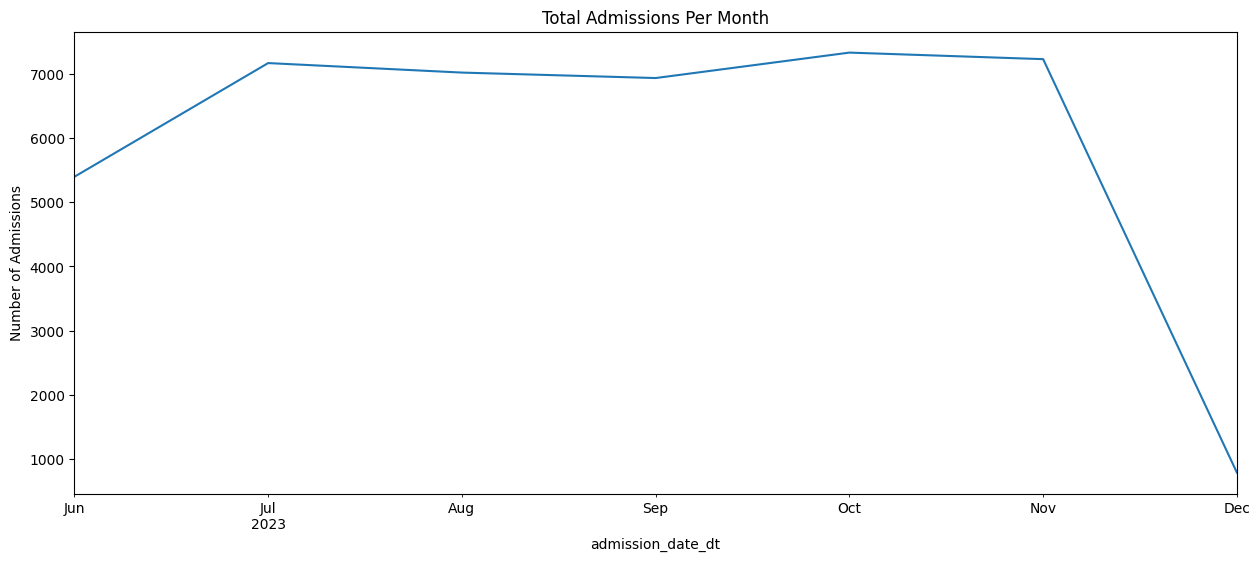

In [20]:
# Set the date as the index
df_plot = df_copy.set_index('admission_date_dt')

# Resample (group) by month('M') and count the number of admissions
admissions_per_month = df_plot.resample('M').size()

# Plot the time series
plt.figure(figsize=(15, 6))
admissions_per_month.plot(title="Total Admissions Per Month")
plt.ylabel("Number of Admissions")
plt.show()


In [21]:
print(df_copy.shape)
columnsToRemove = ["Adm_Dis_Duration", "LOS_Difference", "LOS_Difference2", "Target_Hours_as_Days"] # Admission and discharge date to be removed ltr

df_copy = df_copy.drop(columns = columnsToRemove)
print(df_copy.shape)

(41846, 111)


(41846, 107)


## specialty_spec_code, specialty_local_code
By referring to the data dictionary, specialty_local_code refers to locally recognized specialty code, as the the local code is just a more detailed version of the National code. Therefore, in this case, the specialty_spec code is being kept since it has less categories but covering a broader area.

In [22]:
print(f'Num of null values: {df["specialty_spec_code"].isna().sum()}')
print(f'The total number of specialty_spec_code class: {len(df["specialty_spec_code"].value_counts())}')

print(df_copy.groupby("specialty_spec_code").size())

Num of null values: 0
The total number of specialty_spec_code class: 37
specialty_spec_code
100     3341
101     1186
103      309
104     1249
106       10
107      127
110     6284
120      678
130      639
140      737
142      219
143        1
160      294
180     1974
190       11
191      493
211        2
214        4
290        9
300    10236
301     4753
302        1
303     3128
307        5
314       35
320      930
329       10
340      193
370        2
410      618
420      911
422      413
424      778
430      158
501     1162
502      643
560      303
dtype: int64


As 37 columns indicates a high dimension count for one hot encoding, therefore, it will be grouped down into a few categories, as referenced by- https://archive.datadictionary.nhs.uk/DD%20Release%20March%202022/supporting_information/main_specialty_and_treatment_function_codes_table.html

In [23]:
    # Class: Surgical_Spec
surgical_codes = [100, 101, 103, 104, 106, 107, 110, 120, 130, 140, 142, 143, 160, 191]   
    # Class: Medical_Spec
medical_codes = [180, 190, 300, 301, 302, 303, 307, 314, 320, 329, 340, 370, 410, 420, 422, 424, 430, 501, 502]
    # Class: Children_Spec
children_codes = [211, 214, 290]
    # Class: Other
others = [560]

df_copy["specialty_spec_code"] = df_copy["specialty_spec_code"].replace(surgical_codes, "Surgical_Spec")
df_copy["specialty_spec_code"] = df_copy["specialty_spec_code"].replace(medical_codes, "Medical_Spec")
df_copy["specialty_spec_code"] = df_copy["specialty_spec_code"].replace(children_codes, "Children_Spec")
df_copy["specialty_spec_code"] = df_copy["specialty_spec_code"].replace(others, "Other")
print(df_copy["specialty_spec_code"].value_counts())

specialty_spec_code
Medical_Spec     25961
Surgical_Spec    15567
Other              303
Children_Spec       15
Name: count, dtype: int64


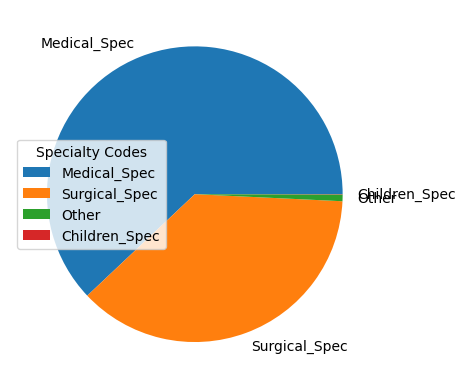

In [24]:
plt.pie(df_copy["specialty_spec_code"].value_counts(), labels=(df_copy["specialty_spec_code"].value_counts()).index)
plt.legend(title="Specialty Codes")
plt.show()

In [25]:
print(df_copy.shape)

df_copy = pd.get_dummies(df_copy, columns = ["specialty_spec_code"], dtype=int)

print(f'\nFinal Encoded DataFrame:\n {df_copy.head()}')

(41846, 107)

Final Encoded DataFrame:
                 site_description site_local_code Admission_Date  \
0                LEIGH INFIRMARY             LEI     2023-07-15   
1          WRIGHTINGTON HOSPITAL             WNT     2023-07-05   
2  ROYAL ALBERT EDWARD INFIRMARY            RAEI     2023-06-08   
3          WRIGHTINGTON HOSPITAL             WNT     2023-06-08   
4  ROYAL ALBERT EDWARD INFIRMARY            RAEI     2023-06-08   

    admission_date_dt   discharge_date_dt specialty_local_code  \
0 2023-07-15 13:57:00 2023-07-15 16:00:00                 CREC   
1 2023-07-05 08:37:00 2023-07-05 10:08:00                   TO   
2 2023-06-08 11:45:00 2023-06-08 12:50:00                   GS   
3 2023-06-08 07:13:00 2023-06-08 17:35:00                   BS   
4 2023-06-08 08:29:00 2023-06-08 15:34:00                   GA   

     specialty_spec_desc ward_code_admission             ward_name_admission  \
0     Colorectal Surgery                GAST          GASTRO DAY UNIT, LEIGH   


## ward_code_admission
ward_name_admission seems to be dependent to the code, therefore can be removed in this place

In [26]:
print(f'The total number of ward_code_admission class: {len(df["ward_code_admission"].value_counts())}')
print(f'The total number of ward_name_admission class: {len(df["ward_name_admission"].value_counts())}\n')

name_counts = df["ward_code_admission"].value_counts() # Creating a new data frame and storing it.
code_counts = df["ward_name_admission"].value_counts()

name_counts_df = name_counts.reset_index() # Reseting their index to print the temporary df out.
code_counts_df = code_counts.reset_index()

my_data = pd.concat([name_counts_df, code_counts_df], axis = 1) 

print(my_data)


The total number of ward_code_admission class: 57
The total number of ward_name_admission class: 57

   ward_code_admission  count             ward_name_admission  count
0                 SDEC   5264          SAME DAY EMRGENCY CARE   5264
1                 GAST   4332          GASTRO DAY UNIT, LEIGH   4332
2                  CDW   2392    CLINICAL DECISION WARD, RAEI   2392
3                  PIU   2374     PLANNED INVESTIGATIONS UNIT   2374
4                  OAU   2034     ORTHOPAEDIC ADMISSIONS UNIT   2034
5                 SAEC   1981  SURGICAL AMBULATORY EMERG CARE   1981
6                  SAL   1675      SURGICAL ADMISSIONS LOUNGE   1675
7                    D   1616            D WARD, WRIGHTINGTON   1616
8                 ENDO   1578            ENDOSCOPY UNIT, RAEI   1578
9                   W1   1536            WARD 1, WRIGHTINGTON   1536
10                 MAU   1502   MEDICAL ASSESSMENT UNIT, RAEI   1502
11                MATU   1476                  MATERNITY UNIT   1476
12

In [27]:
# Suggested to find an ordinal order in here.
grouping_admission_ward = {
    # Class 1: Discharge_Lounge (1) - Patients here for medically fit for discharge.
    "ADL": 1, 
    
    # Class 2: Ambulatory_Daycase (24) - Patients come in for quick assessment, leaving same day
    "SDEC": 2, # Below 14
    "GAST": 2,
    "SAEC": 2,
    "L3E": 2,
    "RWDC": 2,
    "MAU": 2,
    "CAU": 2,
    "EAU":2,
    "GAU": 2,
    "SAL": 2,
    "PIU": 2,
    "OAU": 2,
    "RICH": 2,
    "CAA": 2,
    # Class 2: Others (10) - Since meaning is ambigious, grouped into average.
    "WIN": 2,
    "BWN": 2,
    "JHRU": 2,
    "PEM": 2,
    "BHEW": 2,
    "COPD": 2,
    "XTHT": 2,
    "VM": 2,
    "XTHT": 2,
    "COPD": 2,
    
    # Class 3: Maternity / General Wards (28) - Patients need caring.
    "MATC": 3, # Below 3
    "MATU": 3,
    "NNU": 3,
    # Class 3: Leigh (3)
    "LE3": 3,
    "TR": 3,
    "LE2": 3,
    # Class 3: RAEI (17)
    "CDW": 3,
    "ENDO": 3,
    "RAIN": 3,
    "CATU": 3,
    "ONC": 3,
    "DENT": 3,
    "SWIN": 3,
    "LANG": 3,
    "ORR": 3,
    "LOW": 3,
    "INCE": 3,
    "SHEV": 3,
    "STAN": 3,
    "ASP": 3,
    "AST": 3,
    "ASU": 3,
    "ANG": 3,
    # Class 3: Wrightington (5)
    "W1": 3,
    "D": 3,
    "W7": 3,
    "WA": 3, 
    "WB": 3, 
    "JC": 3,
    
    # Class 4: Critical_Care (5) - Patients here have highest risk and cost.
    "ICU": 4,
    "CCUR": 4,
    "RHDU": 4,
    "NHDU": 4,
    "HDU": 4,
}

df_copy["ward_code_admission"] = df_copy["ward_code_admission"].replace(grouping_admission_ward)
print(df_copy["ward_code_admission"].value_counts())


ward_code_admission
2    21600
3    19415
1      484
4      347
Name: count, dtype: int64


/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/3549082849.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["ward_code_admission"] = df_copy["ward_code_admission"].replace(grouping_admission_ward)


In [28]:
print(df_copy.shape)

df_copy = pd.get_dummies(df_copy, columns = ["ward_code_admission"], dtype=int) 
# Performed one hot encoding, as the categories is only a few

print(f'\nFinal Encoded DataFrame:\n {df_copy.head()}')

(41846, 110)

Final Encoded DataFrame:
                 site_description site_local_code Admission_Date  \
0                LEIGH INFIRMARY             LEI     2023-07-15   
1          WRIGHTINGTON HOSPITAL             WNT     2023-07-05   
2  ROYAL ALBERT EDWARD INFIRMARY            RAEI     2023-06-08   
3          WRIGHTINGTON HOSPITAL             WNT     2023-06-08   
4  ROYAL ALBERT EDWARD INFIRMARY            RAEI     2023-06-08   

    admission_date_dt   discharge_date_dt specialty_local_code  \
0 2023-07-15 13:57:00 2023-07-15 16:00:00                 CREC   
1 2023-07-05 08:37:00 2023-07-05 10:08:00                   TO   
2 2023-06-08 11:45:00 2023-06-08 12:50:00                   GS   
3 2023-06-08 07:13:00 2023-06-08 17:35:00                   BS   
4 2023-06-08 08:29:00 2023-06-08 15:34:00                   GA   

     specialty_spec_desc             ward_name_admission ward_code_discharge  \
0     Colorectal Surgery          GASTRO DAY UNIT, LEIGH                GAST   


## ward_code_discharge
The ward_name_discharge also seems to be name fully dependent to ward_code_discharge, so can be removed.

In [29]:
print(f'The total number of ward_code_discharge class: {len(df["ward_code_discharge"].value_counts())}')
print(f'The total number of ward_name_discharge class: {len(df["ward_name_discharge"].value_counts())}\n')

name_counts = df["ward_name_discharge"].value_counts()
code_counts = df["ward_code_discharge"].value_counts()

name_counts_df = name_counts.reset_index() # Reseting their index to print the temporary df out.
code_counts_df = code_counts.reset_index()

my_data = pd.concat([name_counts_df, code_counts_df], axis = 1)

print(my_data)


The total number of ward_code_discharge class: 59
The total number of ward_name_discharge class: 59

               ward_name_discharge  count ward_code_discharge  count
0           SAME DAY EMRGENCY CARE   4812                SDEC   4812
1           GASTRO DAY UNIT, LEIGH   4331                GAST   4331
2                 DISCHARGE LOUNGE   3423                 ADL   3423
3      PLANNED INVESTIGATIONS UNIT   2366                 PIU   2366
4     CLINICAL DECISION WARD, RAEI   1934                 CDW   1934
5   SURGICAL AMBULATORY EMERG CARE   1758                SAEC   1758
6             ENDOSCOPY UNIT, RAEI   1502                ENDO   1502
7                   MATERNITY UNIT   1473                MATU   1473
8             WARD 1, WRIGHTINGTON   1308                  W1   1308
9       SURGICAL ADMISSIONS LOUNGE   1191                 SAL   1191
10     ORTHOPAEDIC ADMISSIONS UNIT   1145                 OAU   1145
11     MATERNITY COTTED WARD, RAEI   1123                MATC   1123
12

The discharge code will apply the similar grouping logic with the admission code

In [30]:
# Ordinal code for ward_code_discharge
grouping_ward = {
    # Class 1: Discharge_Lounge (DL) (2)
    "ADL": 1, 
    "WDL": 1,
    
    # Class 2: Ambulatory_Daycase (14) - Patients come in for quick assessment, leaving same day
    "SDEC": 2, 
    "GAST": 2,
    "SAEC": 2,
    "L3E": 2,
    "RWDC": 2,
    "MAU": 2,
    "CAU": 2,
    "EAU":2,
    "GAU": 2,
    "SAL": 2,
    "PIU": 2,
    "OAU": 2,
    "RICH": 2,
    "CAA": 2,
    # Class 2: Others (7) - Since meaning is ambigious, grouped into average.
    "WIN": 2,
    "BWN": 2,
    "JHRU": 2,
    "PEM": 2,
    "BHEW": 2,
    "COPD": 2,
    "XTHT": 2,
    
    # Class 3: Maternity (Mat) (3)
    "MATC": 3, 
    "MATU": 3,
    "NNU": 3,
    # Class 3: Leigh (3)
    "LE3": 3,
    "TR": 3,
    "LE2": 3,
    # Class 3: RAEI (18)
    "CDW": 3,
    "ENDO": 3,
    "RAIN": 3,
    "CATU": 3,
    "ONC": 3,
    "DENT": 3,
    "SWIN": 3,
    "LANG": 3,
    "ORR": 3,
    "LOW": 3,
    "INCE": 3,
    "SHEV": 3,
    "STAN": 3,
    "ASP": 3,
    "AST": 3,
    "ASU": 3,
    "ANG": 3,
    "HIGH": 3,
    # Class 3: Wrightington (5)
    "W1": 3,
    "D": 3,
    "W7": 3,
    "WA": 3, 
    "WB": 3, 
    "JC": 3,  
    
    # Class 4: Critical_Care (CC) (6)
    "ICU": 4,
    "CCUR": 4,
    "RHDU": 4,
    "NHDU": 4,
    "NICU": 4,
    "ECU": 4
}

df_copy["ward_code_discharge"] = df_copy["ward_code_discharge"].replace(grouping_ward)
print(df_copy["ward_code_discharge"].value_counts())

ward_code_discharge
3.0    18953
2.0    18702
1.0     3901
4.0      289
Name: count, dtype: int64


/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/3152486177.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["ward_code_discharge"] = df_copy["ward_code_discharge"].replace(grouping_ward)


As this will be causing data leakage, so the column of "ward_code_discharge" will be removed.

## date_of_birth_dt

In [31]:
# Time format data.
print(df["date_of_birth_dt"].info())

print(f'\nNum of null values: {df["date_of_birth_dt"].isna().sum()}')

<class 'pandas.core.series.Series'>
RangeIndex: 41846 entries, 0 to 41845
Series name: date_of_birth_dt
Non-Null Count  Dtype 
--------------  ----- 
41846 non-null  object
dtypes: object(1)
memory usage: 327.0+ KB
None

Num of null values: 0


In [32]:
df_copy['date_of_birth_dt'] = pd.to_datetime(df_copy['date_of_birth_dt'], dayfirst=True)


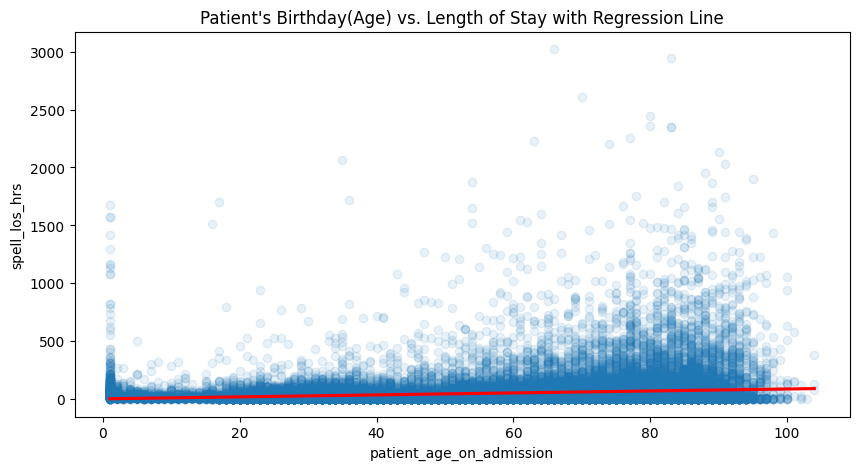

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# This function generates regression line by default through 
# finding a straight line that minimize the total distance between dots and line
sns.regplot( 
    x=df_copy['patient_age_on_admission'], 
    y=df_copy['spell_los_hrs'], 
    scatter_kws={'alpha': 0.1},  # Makes dots transparent
    line_kws={'color': 'red'}  # For plotting the regression line
)

plt.title("Patient's Birthday(Age) vs. Length of Stay with Regression Line")
plt.show()

The graph above of the regression line shows that age has minimal or not obvious effect on predicting patient's length of stay

Since there's patient_age_on_admission column already, there's no need for the date_of_birth column. Therefore, it can be deleted.

## date_of_death_dt
This can be converted to binary values as this imply if the patient is still living.

In [34]:
print(df["date_of_death_dt"].info())

print(f'\nNum of null values: {df["date_of_death_dt"].isna().sum()}')

<class 'pandas.core.series.Series'>
RangeIndex: 41846 entries, 0 to 41845
Series name: date_of_death_dt
Non-Null Count  Dtype 
--------------  ----- 
1531 non-null   object
dtypes: object(1)
memory usage: 327.0+ KB
None

Num of null values: 40315


(41846, 113)


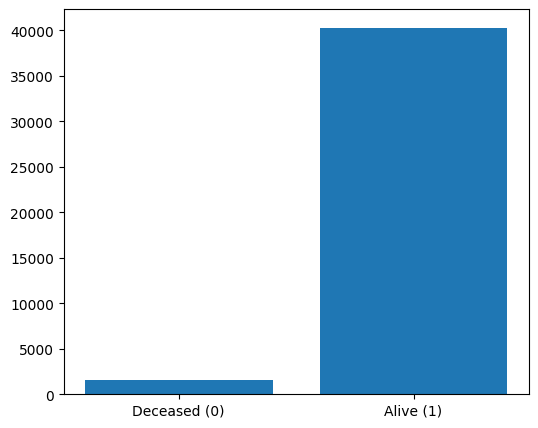

In [35]:
print(df_copy.shape)

living_status_list = []

# If the date_of_death record is null, indicating patient is still alive
for Record in df["date_of_death_dt"]: 
    if pd.isna(Record):
        living_status_list.append(1)
    else: 
        living_status_list.append(0)
        
status_counts = pd.Series(living_status_list).value_counts().sort_index()

statuses = status_counts.index.astype(int)  # The keys (0 and 1)
counts = status_counts.values

# 3. Define clear labels for the plot
labels = ['Deceased (0)', 'Alive (1)'] 

# 4. Create the plot
plt.figure(figsize=(6, 5))
plt.bar(labels, counts)   
plt.show()

As this contain future information that will cause data leakage, which need to be removed as well.

## ethnic_origin_description

ethnic_origin_description
British (White)               37724
NOT KNOWN                      1089
Any other White Background      582
Not Stated                      540
Any other ethnic group          427
Black African                   283
Any other Asian background      212
Any other mixed background      202
Indian                          162
Any other Black Background      161
Irish (White)                   128
Pakistani                       112
Chinese                          69
White and Asian                  49
Black Caribbean                  34
White and Black Caribbean        32
White and Black African          25
DW Generated                      9
Bangladeshi                       6
Name: count, dtype: int64

Num of null values: 0


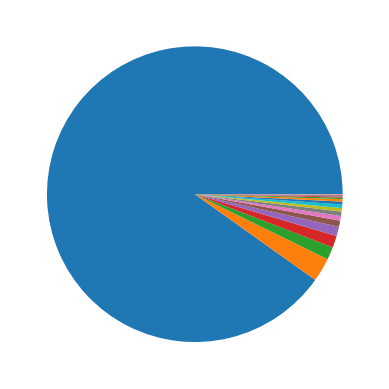

In [36]:
# Categorical
print(df["ethnic_origin_description"].value_counts())

print(f'\nNum of null values: {df["ethnic_origin_description"].isna().sum()}')

plt.pie(df["ethnic_origin_description"].value_counts())
plt.show()

In [37]:
# As one hot encoding may sacrifice some level of details, so
# label encoding is used, as this model is tree based.
# The ordinal order in integer will not affecting the column much.
from sklearn.preprocessing import LabelEncoder

df_copy['ethnic_origin_description'] = LabelEncoder().fit_transform(df_copy['ethnic_origin_description'])

print(df_copy['ethnic_origin_description'].value_counts())


ethnic_origin_description
8     37724
13     1089
2       582
14      540
3       427
6       283
0       212
4       202
11      162
1       161
12      128
15      112
9        69
16       49
7        34
18       32
17       25
10        9
5         6
Name: count, dtype: int64


In [38]:
print(df_copy.shape)

(41846, 113)


## duration_elective_wait

Meaning: If patient admission was planned (elective) then how long had they been waiting (days)

Null: meaning the patient's admission was not planned, likely to be an emergency or just unscheduled admission.

Not Null: meaning the patient's admission was planned and the number of their wait time.

This is removed as it may cause data leakage that biased the model performance

In [39]:
print(df['duration_elective_wait'].describe())

print(f'\nNum of null values: {df["duration_elective_wait"].isna().sum()}')

count    17295.000000
mean       105.389303
std        172.722877
min          0.000000
25%         18.000000
50%         49.000000
75%        132.000000
max       3415.000000
Name: duration_elective_wait, dtype: float64

Num of null values: 24551


In [40]:
print(df_copy.shape)

df_copy["duration_elective_wait"].fillna(-1, inplace=True) # For the duration_elective_wait, fill with 0 for the null value.
print(f'\nNew values in duration_elective_wait: {df_copy["duration_elective_wait"].value_counts().head()}')

(41846, 113)

New values in duration_elective_wait: duration_elective_wait
-1.0    24551
 0.0      405
 9.0      309
 6.0      305
 7.0      303
Name: count, dtype: int64


/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67872/2184597961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["duration_elective_wait"].fillna(-1, inplace=True) # For the duration_elective_wait, fill with 0 for the null value.


## patient_age_on_admission

In [41]:
print(df["patient_age_on_admission"].describe())

print(f'\nNum of null values: {df["patient_age_on_admission"].isna().sum()}')

count    41846.000000
mean        56.907470
std         23.284725
min          1.000000
25%         41.000000
50%         62.000000
75%         75.000000
max        104.000000
Name: patient_age_on_admission, dtype: float64

Num of null values: 0


Text(0.5, 0, 'Histogram for patient_age_on_admission')

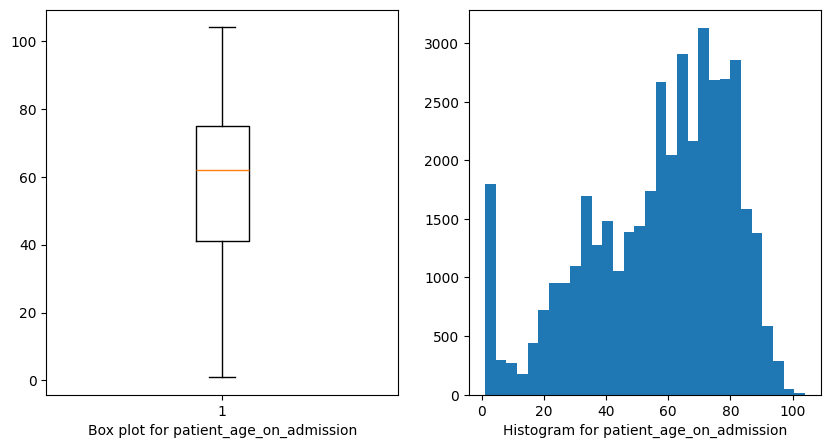

In [42]:
figure, axis = plt.subplots(1, 2, figsize = (10, 5))

axis[0].boxplot(df['patient_age_on_admission'])
axis[0].set_xlabel('Box plot for patient_age_on_admission')

axis[1].hist(df['patient_age_on_admission'], bins = 30)
axis[1].set_xlabel('Histogram for patient_age_on_admission')

## patient_age_on_discharge
This is removed as it may cause data leakage that biased the model performance

In [43]:
# patient_age_on_discharge
print(df["patient_age_on_discharge"].describe())

print(f'\nNum of null values: {df["patient_age_on_discharge"].isna().sum()}')

count    41846.000000
mean        56.912274
std         23.287412
min          1.000000
25%         41.000000
50%         62.000000
75%         75.000000
max        104.000000
Name: patient_age_on_discharge, dtype: float64

Num of null values: 0


Text(0.5, 0, 'patient_age_on_discharge')

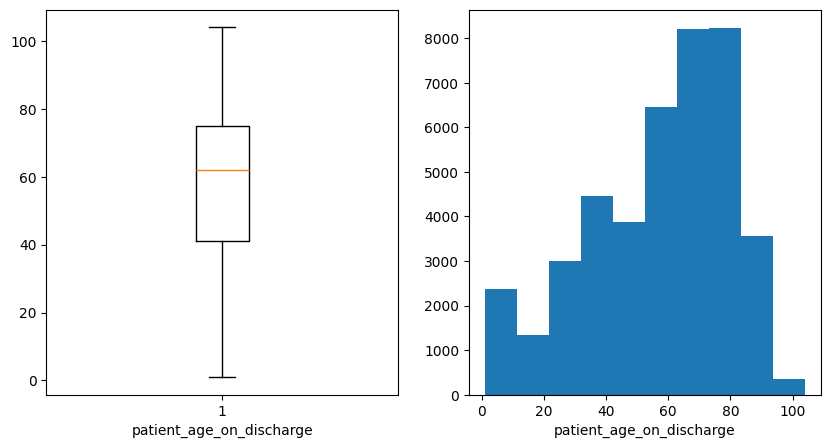

In [44]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

axis[0].boxplot(df['patient_age_on_discharge'])
axis[0].set_xlabel('patient_age_on_discharge')

axis[1].hist(df['patient_age_on_discharge'])
axis[1].set_xlabel('patient_age_on_discharge')

In [45]:
# Since min age of 1 or 104 is valid and no null value found inside, therefore the preprocessing will focus on Scaling.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # As default range is 0 to 1
scaled_data = scaler.fit_transform(df_copy[["patient_age_on_discharge"]])
df_copy["patient_age_on_discharge"] = scaled_data

print(df["patient_age_on_discharge"].head(10))
print(df_copy["patient_age_on_discharge"].head(10))

0    76
1    66
2    48
3    49
4    61
5    76
6    65
7    76
8    62
9    64
Name: patient_age_on_discharge, dtype: int64
0    0.728155
1    0.631068
2    0.456311
3    0.466019
4    0.582524
5    0.728155
6    0.621359
7    0.728155
8    0.592233
9    0.611650
Name: patient_age_on_discharge, dtype: float64


Since this column convey minimal to almost no information, which most likely is just noise, so this column will be removed as well.

## spell_episode_los
This will be removed as it is closely similar to target variable (spell_los_hrs), which will distract the model and cause confusion. 

In [46]:
# spell_episode_los
print(df["spell_episode_los"].describe())

print(f'\nNum of null values: {df["spell_episode_los"].isna().sum()}')

count    41846.000000
mean         1.759427
std          5.281628
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        123.000000
Name: spell_episode_los, dtype: float64

Num of null values: 0


spell_episode_los
0      28300
1       3919
2       2428
3       1707
4       1128
5        803
6        589
7        459
8        336
9        260
10       208
11       164
12       154
13       137
14       136
15       125
16        83
17        83
18        71
20        63
21        61
19        58
22        44
23        38
27        36
26        35
24        34
25        27
28        26
29        22
31        21
30        21
33        20
38        19
34        18
36        15
32        15
35        13
37        13
42        12
41         9
43         8
45         7
44         7
48         6
51         6
39         6
46         6
40         6
47         5
61         5
52         5
60         5
50         4
58         4
69         4
71         4
49         3
54         3
59         3
98         3
56         3
64         3
63         3
73         2
67         2
78         2
55         2
53         2
66         2
89         1
82         1
92         1
94         1
57         1
123    

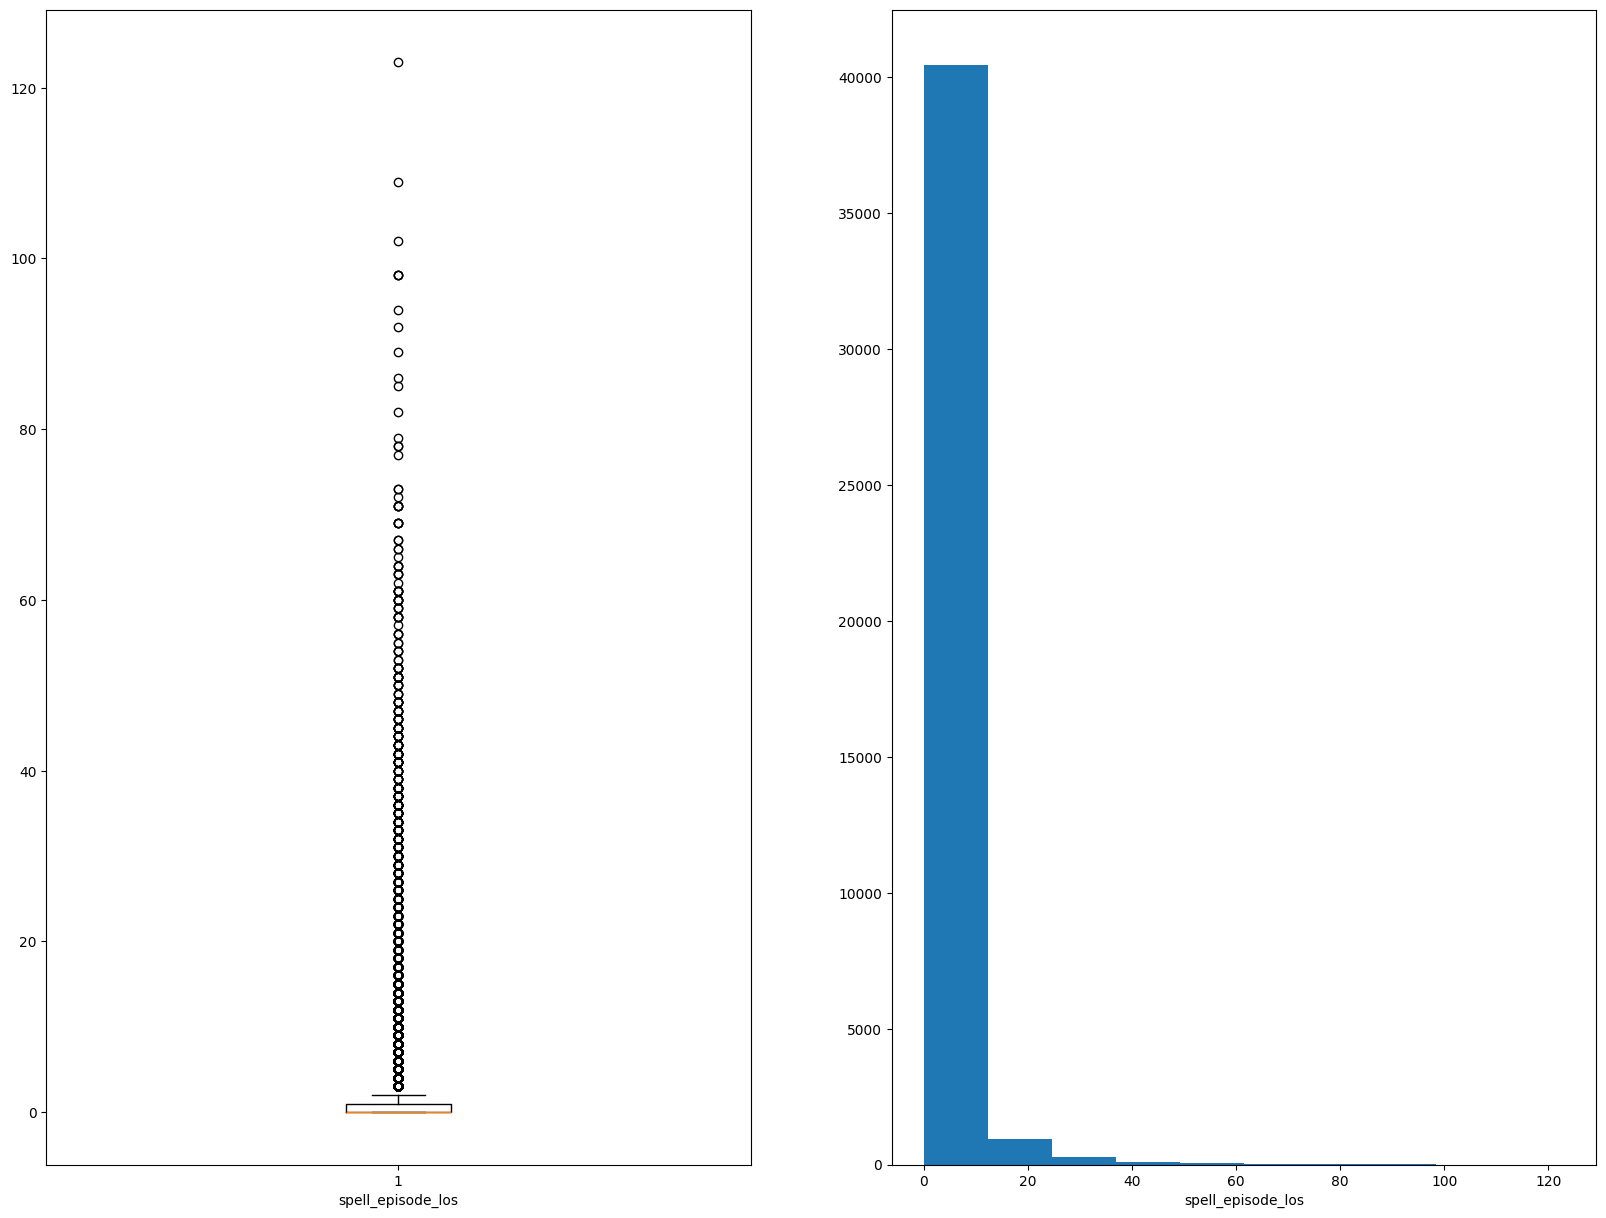

In [47]:
figure, axis = plt.subplots(1, 2, figsize = (20, 15))

axis[0].boxplot(df['spell_episode_los'])
axis[0].set_xlabel("spell_episode_los")

axis[1].hist(df['spell_episode_los'])
axis[1].set_xlabel("spell_episode_los")

df['spell_episode_los'].value_counts()

This column will be removed as it is very similar with target variable, but the meaning is quite different, might affecting the model prediction.

# Column Removal

In [48]:
columnsToRemove = {
    "site_description",
    "site_local_code",
    "Admission_Date",
    "admission_date_dt",
    "discharge_date_dt",
    "ward_code_discharge",
    "specialty_local_code",
    "specialty_spec_desc",
    "ward_name_admission",
    "ward_name_discharge", 
    "date_of_birth_dt",
    "date_of_death_dt",
    "patient_age_on_discharge",
    "duration_elective_wait",
    "spell_episode_los"
}

df_copy = df_copy.drop(columns= columnsToRemove)

In [49]:
print(df_copy.shape)

(41846, 98)


In [50]:
df_copy.to_csv(('../../data/processed/merge_Jin_col_1_20.csv'))